In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
#para plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
from matplotlib import rcParams
#para modelagem
import scipy.stats as stats
import sklearn
import statsmodels.api as sm

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
enemsp = pd.read_csv('dadosSP.csv')
enemsp.head()

,Unnamed: 0,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0,Araraquara,29.0,F,1,1,11,1,0,NaN,445.4,589.0,621.5,465.5,560.0
1,21,Diadema,19.0,F,1,1,2,1,0,NaN,402.9,447.6,537.3,425.5,640.0
2,25,Santa Fé do Sul,24.0,M,1,1,7,1,0,NaN,706.5,709.9,625.1,769.1,620.0
3,32,São Paulo,28.0,F,2,1,11,1,0,NaN,631.1,609.7,596.1,535.5,720.0
4,45,São Paulo,18.0,F,1,1,1,1,0,NaN,685.2,719.2,619.4,799.6,800.0


In [6]:
enemsp['NOTA_MED'] = (enemsp.NU_NOTA_CH + enemsp.NU_NOTA_CN + enemsp.NU_NOTA_LC + enemsp.NU_NOTA_MT + enemsp.NU_NOTA_REDACAO)/5
enemsp.head()

,Unnamed: 0,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MED
0,0,Araraquara,29.0,F,1,1,11,1,0,NaN,445.4,589.0,621.5,465.5,560.0,536.28
1,21,Diadema,19.0,F,1,1,2,1,0,NaN,402.9,447.6,537.3,425.5,640.0,490.66
2,25,Santa Fé do Sul,24.0,M,1,1,7,1,0,NaN,706.5,709.9,625.1,769.1,620.0,686.12
3,32,São Paulo,28.0,F,2,1,11,1,0,NaN,631.1,609.7,596.1,535.5,720.0,618.48
4,45,São Paulo,18.0,F,1,1,1,1,0,NaN,685.2,719.2,619.4,799.6,800.0,724.68


In [7]:
enemsp.drop('Unnamed: 0', axis = 1, inplace = True)
enemsp.head()

,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MED
0,Araraquara,29.0,F,1,1,11,1,0,NaN,445.4,589.0,621.5,465.5,560.0,536.28
1,Diadema,19.0,F,1,1,2,1,0,NaN,402.9,447.6,537.3,425.5,640.0,490.66
2,Santa Fé do Sul,24.0,M,1,1,7,1,0,NaN,706.5,709.9,625.1,769.1,620.0,686.12
3,São Paulo,28.0,F,2,1,11,1,0,NaN,631.1,609.7,596.1,535.5,720.0,618.48
4,São Paulo,18.0,F,1,1,1,1,0,NaN,685.2,719.2,619.4,799.6,800.0,724.68


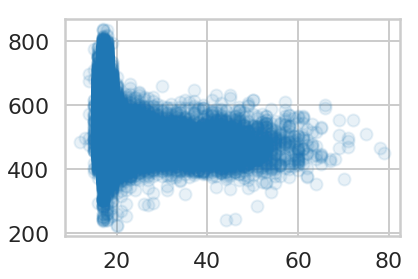

In [33]:
plt.scatter('NU_IDADE','NOTA_MED',data=enemsp, alpha = 0.1)

Trying to fit a linear regression using the NOTA_MED as the target and using NU_IDADE to predict

In [10]:
enemsp.shape

(695684, 15)

In [11]:
sum(enemsp.TP_DEPENDENCIA_ADM_ESC.value_counts())

275615

In [12]:
enemsp.dropna(axis=0,how='any', inplace = True)

In [13]:
enemsp.shape

(275603, 15)

In [14]:
sum(enemsp.TP_DEPENDENCIA_ADM_ESC.value_counts())

275603

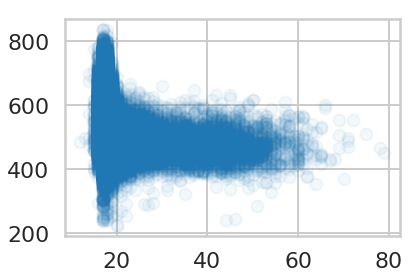

In [34]:
plt.scatter('NU_IDADE','NOTA_MED',data=enemsp, alpha = 0.05)

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('NOTA_MED ~ NU_IDADE',enemsp).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               NOTA_MED   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4272.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:04:45   Log-Likelihood:            -1.5619e+06
No. Observations:              275603   AIC:                         3.124e+06
Df Residuals:                  275601   BIC:                         3.124e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    590.8390      0.879    672.129      0.0

The R-squared was awful, implying that it isn't a linear relation

Text(0.5,1,'Notas vs Notas previstas: $Y_i$ vs $\\hat{Y}_i$')

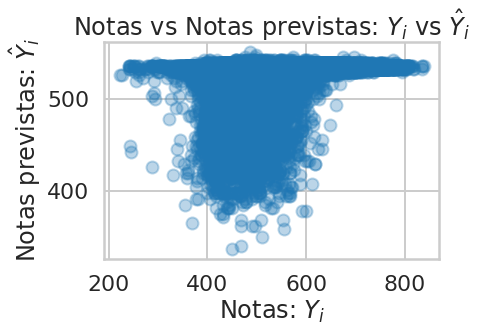

In [17]:
plt.scatter(enemsp['NOTA_MED'], m.fittedvalues, alpha = 0.3)
plt.xlabel("Notas: $Y_i$")
plt.ylabel("Notas previstas: $\hat{Y}_i$")
plt.title("Notas vs Notas previstas: $Y_i$ vs $\hat{Y}_i$")

Trying to predict NOTA_MED using NU_NOTA_MT

In [18]:
p = ols('NOTA_MED ~ NU_NOTA_MT',enemsp).fit()
print(p.summary())

                            OLS Regression Results                            
Dep. Variable:               NOTA_MED   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 5.174e+05
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:04:54   Log-Likelihood:            -1.4184e+06
No. Observations:              275603   AIC:                         2.837e+06
Df Residuals:                  275601   BIC:                         2.837e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.3072      0.408    603.999      0.0

The R-squared is a little better than the previous one

Text(0.5,1,'Notas vs Notas previstas: $Y_i$ vs $\\hat{Y}_i$')

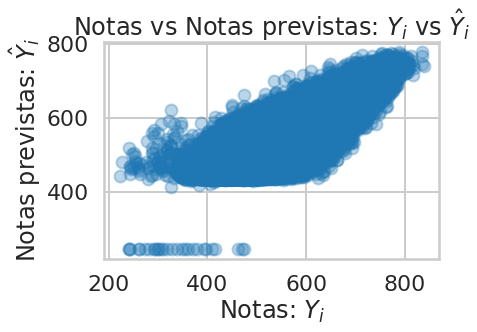

In [19]:
plt.scatter(enemsp['NOTA_MED'], p.fittedvalues, alpha = 0.3)
plt.xlabel("Notas: $Y_i$")
plt.ylabel("Notas previstas: $\hat{Y}_i$")
plt.title("Notas vs Notas previstas: $Y_i$ vs $\hat{Y}_i$")

It looks a little more, but our predictions are upper from the real notes, and we had a problem down in Nota previstas = ~150

In [20]:
q = ols('NU_NOTA_REDACAO ~ NU_NOTA_MT',enemsp).fit()
print(q.summary())

                            OLS Regression Results                            
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                 7.573e+04
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:05:04   Log-Likelihood:            -1.6752e+06
No. Observations:              275603   AIC:                         3.350e+06
Df Residuals:                  275601   BIC:                         3.350e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    281.9097      1.035    272.269      0.0

Text(0.5,1,'Notas vs Notas previstas: $Y_i$ vs $\\hat{Y}_i$')

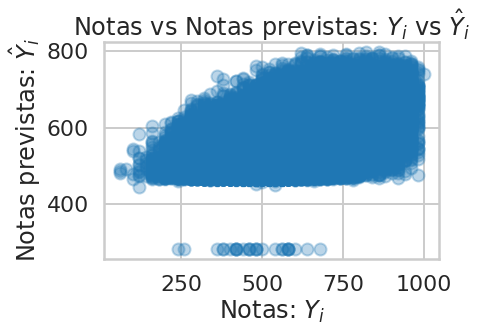

In [21]:
plt.scatter(enemsp['NU_NOTA_REDACAO'], q.fittedvalues, alpha = 0.3)
plt.xlabel("Notas: $Y_i$")
plt.ylabel("Notas previstas: $\hat{Y}_i$")
plt.title("Notas vs Notas previstas: $Y_i$ vs $\hat{Y}_i$")

Every one of our regressions had a really bad R-squared, now we gonna use the sklearn model to use a bigger quantity of independentes variables

In [22]:
X = enemsp.drop('NOTA_MED', axis=1)

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [24]:
lm.fit(X[['NU_IDADE','NU_NOTA_MT','NU_NOTA_REDACAO']], enemsp.NOTA_MED)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lm.score(X[['NU_IDADE','NU_NOTA_MT','NU_NOTA_REDACAO']], enemsp.NOTA_MED)

0.871628962477909

In [26]:
lm.intercept_

155.6291062650422

In [27]:
pd.DataFrame({'feature':['NU_IDADE','NU_NOTA_MT','NU_NOTA_REDACAO'],'estimated_coefficients':lm.coef_},columns=['feature','estimated_coefficients'])

,feature,estimated_coefficients
0,NU_IDADE,0.127086
1,NU_NOTA_MT,0.373134
2,NU_NOTA_REDACAO,0.313013


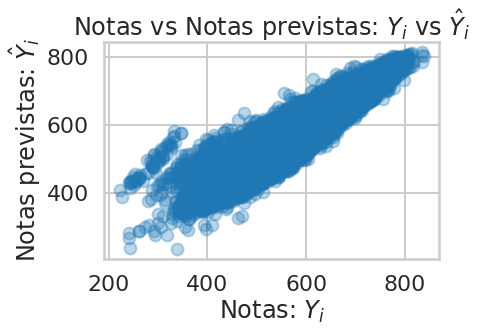

In [35]:
plt.scatter(enemsp['NOTA_MED'], lm.predict(X[['NU_IDADE','NU_NOTA_MT','NU_NOTA_REDACAO']])[:], alpha = 0.3)
plt.xlabel("Notas: $Y_i$")
plt.ylabel("Notas previstas: $\hat{Y}_i$")
plt.title("Notas vs Notas previstas: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [29]:
enemsp.columns

Index(['NO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_MED'],
      dtype='object')

In [31]:
enemsp.head()

,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MED
8,São Paulo,17.0,F,3,2,0,2,0,2.0,452.8,451.3,529.1,439.1,520.0,478.46
10,Santa Bárbara d'Oeste,18.0,F,2,2,0,2,0,2.0,496.0,484.3,515.7,531.8,520.0,509.56
16,Cosmorama,17.0,M,2,2,0,2,0,2.0,580.5,650.1,597.1,600.2,500.0,585.58
34,Águas de Lindóia,17.0,F,1,2,0,3,0,4.0,656.7,669.7,667.9,686.2,800.0,696.10
36,Suzano,17.0,M,1,2,0,2,0,2.0,674.3,628.5,569.1,664.1,700.0,647.20


In [43]:
lm1 = LinearRegression()
lm1.fit(X[['NO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC']], enemsp.NOTA_MED)
lm1.score(X[['NO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC']], enemsp.NOTA_MED)

ValueError: could not convert string to float: 'São Paulo'

I need to transform de city data and the sex data to categorical

In [44]:
enemsp.dtypes

NO_MUNICIPIO_RESIDENCIA     object
NU_IDADE                   float64
TP_SEXO                     object
TP_COR_RACA                  int64
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
IN_TREINEIRO                 int64
TP_DEPENDENCIA_ADM_ESC     float64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
NOTA_MED                   float64
dtype: object

In [46]:
enemsp.NO_MUNICIPIO_RESIDENCIA = enemsp.NO_MUNICIPIO_RESIDENCIA.astype('category')

In [47]:
enemsp['NO_MUNICIPIO_RESIDENCIA_C'] = enemsp.NO_MUNICIPIO_RESIDENCIA.cat.codes
enemsp.head()

,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MED,NO_MUNICIPIO_RESIDENCIA_C
8,São Paulo,17.0,F,3,2,0,2,0,2.0,452.8,451.3,529.1,439.1,520.0,478.46,572
10,Santa Bárbara d'Oeste,18.0,F,2,2,0,2,0,2.0,496.0,484.3,515.7,531.8,520.0,509.56,508
16,Cosmorama,17.0,M,2,2,0,2,0,2.0,580.5,650.1,597.1,600.2,500.0,585.58,133
34,Águas de Lindóia,17.0,F,1,2,0,3,0,4.0,656.7,669.7,667.9,686.2,800.0,696.10,638
36,Suzano,17.0,M,1,2,0,2,0,2.0,674.3,628.5,569.1,664.1,700.0,647.20,551


In [48]:
enemsp.TP_SEXO = enemsp.TP_SEXO.astype('category')
enemsp['TP_SEXO_C'] = enemsp.TP_SEXO.cat.codes
enemsp.head()

,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MED,NO_MUNICIPIO_RESIDENCIA_C,TP_SEXO_C
8,São Paulo,17.0,F,3,2,0,2,0,2.0,452.8,451.3,529.1,439.1,520.0,478.46,572,0
10,Santa Bárbara d'Oeste,18.0,F,2,2,0,2,0,2.0,496.0,484.3,515.7,531.8,520.0,509.56,508,0
16,Cosmorama,17.0,M,2,2,0,2,0,2.0,580.5,650.1,597.1,600.2,500.0,585.58,133,1
34,Águas de Lindóia,17.0,F,1,2,0,3,0,4.0,656.7,669.7,667.9,686.2,800.0,696.10,638,0
36,Suzano,17.0,M,1,2,0,2,0,2.0,674.3,628.5,569.1,664.1,700.0,647.20,551,1


In [50]:
X = enemsp.drop('NOTA_MED', axis = 1)
X.head()

,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_RESIDENCIA_C,TP_SEXO_C
8,São Paulo,17.0,F,3,2,0,2,0,2.0,452.8,451.3,529.1,439.1,520.0,572,0
10,Santa Bárbara d'Oeste,18.0,F,2,2,0,2,0,2.0,496.0,484.3,515.7,531.8,520.0,508,0
16,Cosmorama,17.0,M,2,2,0,2,0,2.0,580.5,650.1,597.1,600.2,500.0,133,1
34,Águas de Lindóia,17.0,F,1,2,0,3,0,4.0,656.7,669.7,667.9,686.2,800.0,638,0
36,Suzano,17.0,M,1,2,0,2,0,2.0,674.3,628.5,569.1,664.1,700.0,551,1


In [51]:
lm1 = LinearRegression()
lm1.fit(X[['NO_MUNICIPIO_RESIDENCIA_C', 'NU_IDADE', 'TP_SEXO_C', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC']], enemsp.NOTA_MED)
lm1.score(X[['NO_MUNICIPIO_RESIDENCIA_C', 'NU_IDADE', 'TP_SEXO_C', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC']], enemsp.NOTA_MED)

0.2555159577467